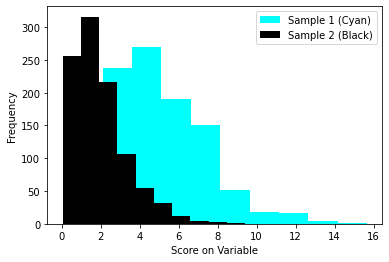

Sample 1 is not normally distributed.

NormaltestResult(statistic=153.37006544106475, pvalue=4.9672205652273e-34)

Sample 2 is not normally distributed.

NormaltestResult(statistic=212.73611590618023, pvalue=6.381744021671277e-47) 

Sample 1 Median: 4.775
Sample 2 Median: 1.6769 



,change_score,abs_change,rank
191,-0.005255,0.005255,1
893,-0.008428,0.008428,2
415,0.009415,0.009415,3
220,0.014742,0.014742,4
927,-0.020308,0.020308,5
...,...,...,...
344,-8.502285,8.502285,996
552,-8.896213,8.896213,997
24,-8.954292,8.954292,998
770,-9.111810,9.111810,999


Manually calculated Wilcoxon Signed rank test statistic = 157888.0 , p =  0.0

Wilcoxon's signed rank test statistic calculated with scipy.stats =  157888.0 , p =  4.9798878696460654e-24


In [32]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

# generating non-normal data

sample_1 = np.random.gamma(4, size = 1000)

    
sample_2 = np.random.gamma(3, size = 1000)


# plotting the samples

plt.hist(sample1, color = 'cyan')
plt.hist(sample2, color = 'black')
plt.xlabel('Score on Variable')
plt.ylabel('Frequency')
plt.legend(['Sample 1 (Cyan)', 'Sample 2 (Black)'])
plt.show()


# checking for normality

normtest_1 = scipy.stats.normaltest(sample_1)
normtest_2 = scipy.stats.normaltest(sample_2)

if normtest_1[1] <= 0.05:
    print('Sample 1 is not normally distributed.\n')
    print(normtest_1)
    
else:
    print('Sample 1 is normally distributed.\n')
    print(normtest_1)
    
if normtest_2[1] <= 0.05:
    print('\nSample 2 is not normally distributed.\n')
    print(normtest_2, '\n')
else:
    print('\nSample 2 is normally distributed.\n')
    print(normtest_2, '\n')
    
print('Sample 1 Median:', round(statistics.median(sample1),4))
print('Sample 2 Median:', round(statistics.median(sample2),4), '\n')

# performing Wilcoxon's signed rank test

change = sample_2 - sample_1
abs_change = np.abs(change)
df = pd.DataFrame({'change_score': change, 'abs_change': abs_change})
df.sort_values(by = 'abs_change', inplace = True)
df['rank'] = np.arange(1, len(df)+1)
display(df)

sum_neg_ranks = np.array([])
sum_pos_ranks = np.array([])

for i in np.arange(len(df)):
    if df['change_score'].iloc[i] < 0: 
        sum_neg_ranks = np.append(sum_neg_ranks,  df['rank'].iloc[i])
        
    elif df['change_score'].iloc[i] > 0: 
        sum_pos_ranks = np.append(sum_pos_ranks,  df['rank'].iloc[i])
        
    elif df['change_score'].iloc[i] == 0:
        coinflip = np.random.choice([0,1])
        if coinflip == 0:
            sum_neg_ranks = np.append(sum_neg_ranks,  df['rank'].iloc[i])
        elif coinflip == 1:
            sum_pos_ranks = np.append(sum_neg_ranks,  df['rank'].iloc[i])

sum_neg_ranks = np.sum(sum_neg_ranks)
sum_pos_ranks = np.sum(sum_pos_ranks)

test_stat = np.min([sum_neg_ranks, sum_pos_ranks])

# calculating a p-value with the normal approximation (https://www.statstutor.ac.uk/resources/uploaded/wilcoxonsignedranktest.pdf)

n = len(df)
mu = (n*(n+1))/4
se = np.sqrt( (n*(n+1)*(2*n+1))/24)
z = (test_stat - mu)/se

p_value = 1 - scipy.stats.norm.cdf(abs(z))

print('Manually calculated Wilcoxon Signed rank test statistic =', test_stat, ', p = ', p_value)

    
# performing Wilcoxon's signed rank test with scipy.stats
    
signed_rank_scipy = scipy.stats.wilcoxon(sample_1,sample_2)


print("\nWilcoxon's signed rank test statistic calculated with scipy.stats = ", signed_rank_scipy[0], ', p = ', signed_rank_scipy[1])



